## Линейная алгебра. Лабораторная работа 1, осень 2020

В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:
.
- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [6]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных &mdash; это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [7]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`.

*Умножение матриц* производится с помощью оператора `np.dot()`. Есть два варианта написания: `A.dot(B)` и `np.dot(A, B)`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` &mdash; это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` &mdash; это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` &mdash; это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

**И всё-таки задание**

В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

А сейчас мы в качестве примера создадим единичную матрицу:

In [2]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [9]:
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [18]:
np.diag([1, 2, 3, 4, 5])

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

In [19]:
a = np.diag([1, 2, 3, 4, 5])
np.trace(a)

15

In [20]:
a = np.diag([1, 2, 3, 4, 5])
sla.inv(a)

array([[ 1.        ,  0.        ,  0.        ,  0.        , -0.        ],
       [ 0.        ,  0.5       ,  0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.33333333,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.25      , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.2       ]])

In [78]:
x = np.random.randint(-1000, 1000, (4, 5))
print(x)

[[ 540 -487 -333  634  102]
 [ 708  137  900  221  284]
 [-875 -623  614 -457  116]
 [-480  624  753 -262  433]]


In [79]:
print(sla.det(x[1:3,0:2]))

-321209.0


In [80]:
x_t = np.transpose(x)
print(x_t.dot(x))

[[1788889   79621 -441310 1024463  -53188]
 [  79621 1033443  372821 -157258  187158]
 [-441310  372821 1864894 -490106  618907]
 [1024463 -157258 -490106  728290  -39026]
 [ -53188  187158  618907  -39026  292005]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [504]:
#проверка квадратна ли матрица
def chek_0(X):
    if len(X) == len(*X[0:1, :]):
        return True
    else:
        return False


#функция, которая в подматрице st*st ставит на первую строку такую строку, что первый её элемент не являлся нулевум
#дабы в будущем удалось занулить нижестоящие строки Гаусом
def change(Y, st):
    X = Y[st:, st:]
    if X[0: 1, 0: 1] == 0:
        for i in range(len(X)):      # поиск не нулевого первого элемента
            if X[i: i + 1, 0:1] != 0:
                dop = list(*X[i: i + 1, :])
                X[i: i + 1, :] = -1 * X[0: 1, :]
                X[0: 1, :] = dop
                Y[st:, st:] = X
                return Y
        return Y * 0   #если подматрица провалилась через весь цикл => весь столбец нулевой => det=0
    else:
        Y[st:, st:] = X  # вставляем уже изменённую подматрицу обратно
        return Y


def my_det(X):
    if chek_0(X):  # проверка квадратна ли 
        for st in range(len(*X[0: 1, :]) - 1):
            X = change(X, st)  # ставим не нулевой элемент, что бы бахнуть Гауса 
            for i in range(st + 1, len(X)):  # реализация самого Гауса
                if X[i: i + 1, st:st + 1] != 0: # нет смысла вычетать, если в строчке уже 0
                    b_2 = float(X[st:st + 1, st:st + 1])
                    b_1 = float(X[i: i + 1, st:st + 1])
                    X[i: i + 1, :] = X[i: i + 1, :] - X[st:st + 1, :] * (b_1 / b_2)
        det = 1
        for i in range(len(X)): # так как привели к верхнетриугольной, можем и произведение диагонали сощетать 
            det *= X[i: i + 1, i: i + 1]
        return float(det)
    else:
        return 'ValueError'

Простая проверка:

In [505]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(X)
print(my_det(X))

[[0 0 1]
 [0 1 0]
 [1 0 0]]
-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [506]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8,8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

28.9 µs ± 868 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
285 µs ± 3.64 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
246 µs ± 17.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
53.5 ms ± 2.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
27.1 ms ± 938 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<ipython-input-85-1e5c651b8fc3>:35: RuntimeWarning: overflow encountered in multiply
  det *= X[i: i + 1, i: i + 1]


10.2 s ± 2.32 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


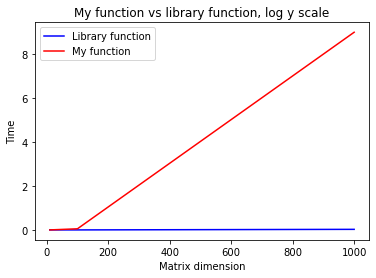

In [92]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

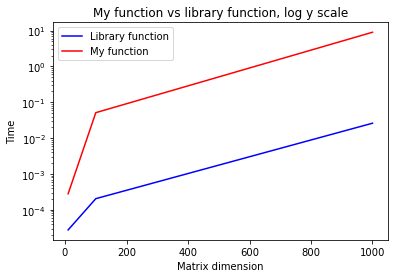

In [93]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [84]:
a_1 = np.array([[1, 0], [10 ** 20, 1]])
b_1 = np.array([[10 ** (-20), 1], [0, 1 - 10 ** 20]])
a_2 = np.array([[1., 0.], [10. ** 20, 1.]])
b_2 = np.array([[10. ** (-20), 1], [0., 1. - 10. ** 20]])
print(a_1.dot(b_1))
print(a_2.dot(b_2))

[[1e-20 1]
 [1.0 1]]
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


Правильный - первый

Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [95]:
def my_pascal(n):
    a, b = np.zeros((n, n)), np.zeros((n, n))
    for i in range(1, n):
        a[i:i + 1, i - 1:i] = i
        b[i - 1: i, i:i + 1] = i
    return sla.expm(a).dot(sla.expm(b))

Заметим, что если 
A = (верхнетриугольная матрица Паскаля n*n), 
B = (нижнетриугольная матрица Паскаля n*n), 
то A * B= (матрица Паскаля n*n) => 
так как det(x*y) = det(x) * det(y) и очевидно, 
det(A) = det(B) = 1 => 
det(матрица Паскаля) = det(A * B) = =det(A) * det(B) = 1 * 1 = 1

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [114]:
print(sla.det(my_pascal(30)))

5.229214441417895e+49


Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [463]:
def prod_and_sq_sum(A):
    diag = np.diagonal(A)
    return sum(diag ** 2), np.prod(diag)

**Задание 4.2** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы. Напишите функцию `f(A, B, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,m)}a_ib_i^T$$

In [508]:
def summa(A, B, k):
    l = min(k, len(A[0])) - 1
    A = A[:, : l + 1]
    B = np.transpose(B)[: l + 1, :]
    return A.dot(B)


m = int(input())
n = int(input())
k = int(input())
A = np.random.randint(0, 10, (n, m))
B = np.random.randint(0, 10, (n, m))
print(summa(A, B, k))


4
5
3
[[ 56  76  52  22  48]
 [ 83  72  20  42  38]
 [ 97 105  52  46  59]
 [ 66  58  14  41  20]
 [ 39  40  14  29   8]]


**Задание 4.3** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [470]:
def get_diag(A, B):
    B = np.transpose(B)
    return (A * B).sum(axis=1)   
    #так как X_(i,i) = A_i * B^i
    #(A * B) != (A.dot(B)), так как (A * B) - поэлементное умножение



n = int(input())
A = np.random.randint(0, 10, (n, n))
B = np.random.randint(0, 10, (n, n))
print(get_diag(A, B))

6
[ 67 101 159  83 143 116]


## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

**Внимание!** При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Решения, в которых в какой-либо момент работа происходит не с комплексным числом как таковым, а с парой вещественных, будут оцениваться нулём баллов. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">
**Задание 5.3** Напишите функцию `geometric_inverse`, которая принимает на вход:

**Задание 5.2** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [511]:
def shrink_rotate(X, A, coef, angle):
    return (X - A) * coef * (np.cos(angle) + 1j * np.sin(angle)) + A
    #(X - A) * coef - удлинили вектор AX
    # * (np.cos(angle) + 1j * np.sin(angle)) - повернули на угол (angle)
    # теперь у нас есть вектор, который совпадает с вектором A(искомая точка), но правда полученный вектор имеет начало 0 а не A
    # так что действием (+ A) мы поставим вектор на нужное нам место
    

def shrink_rotate_conj(x, a, coef, angle):
    return ((X - A) * coef * (np.cos(angle) + 1j * np.sin(angle))).conjugate() + A
    # ну а тут просто во время возьмём сопряжённое
    

def geometric_inverse(x, a, r):
    return ((r ** 2) / (x.conjugate() - a.conjugate())) + a
    # просто формула из Понарина

**Задание 5.4** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

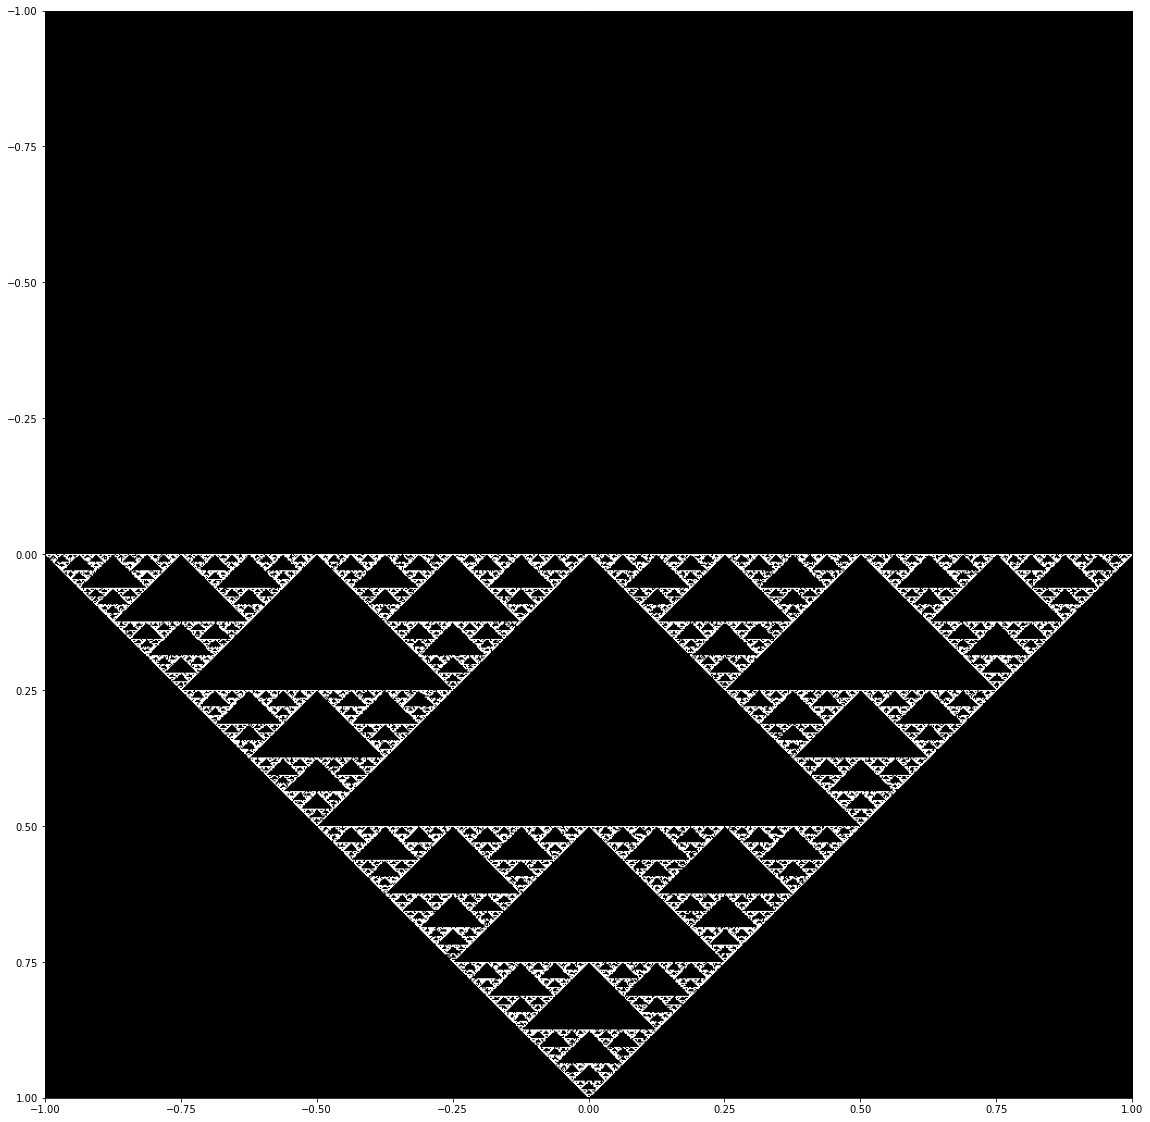

In [175]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]
pics = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    pics[int((z.imag + 1) * 500) % 999, int((z.real + 1) * 500) % 999] = 1
plt.figure(figsize=(20, 20))
plt.imshow(pics, cmap='gray', extent=[-1, 1, 1, -1])

**Задание 5.5 (со звёздочкой)** Попробуйте объяснить, почему получается именно эта фигура.

---
Ваше объяснение

**Задание 5.6** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

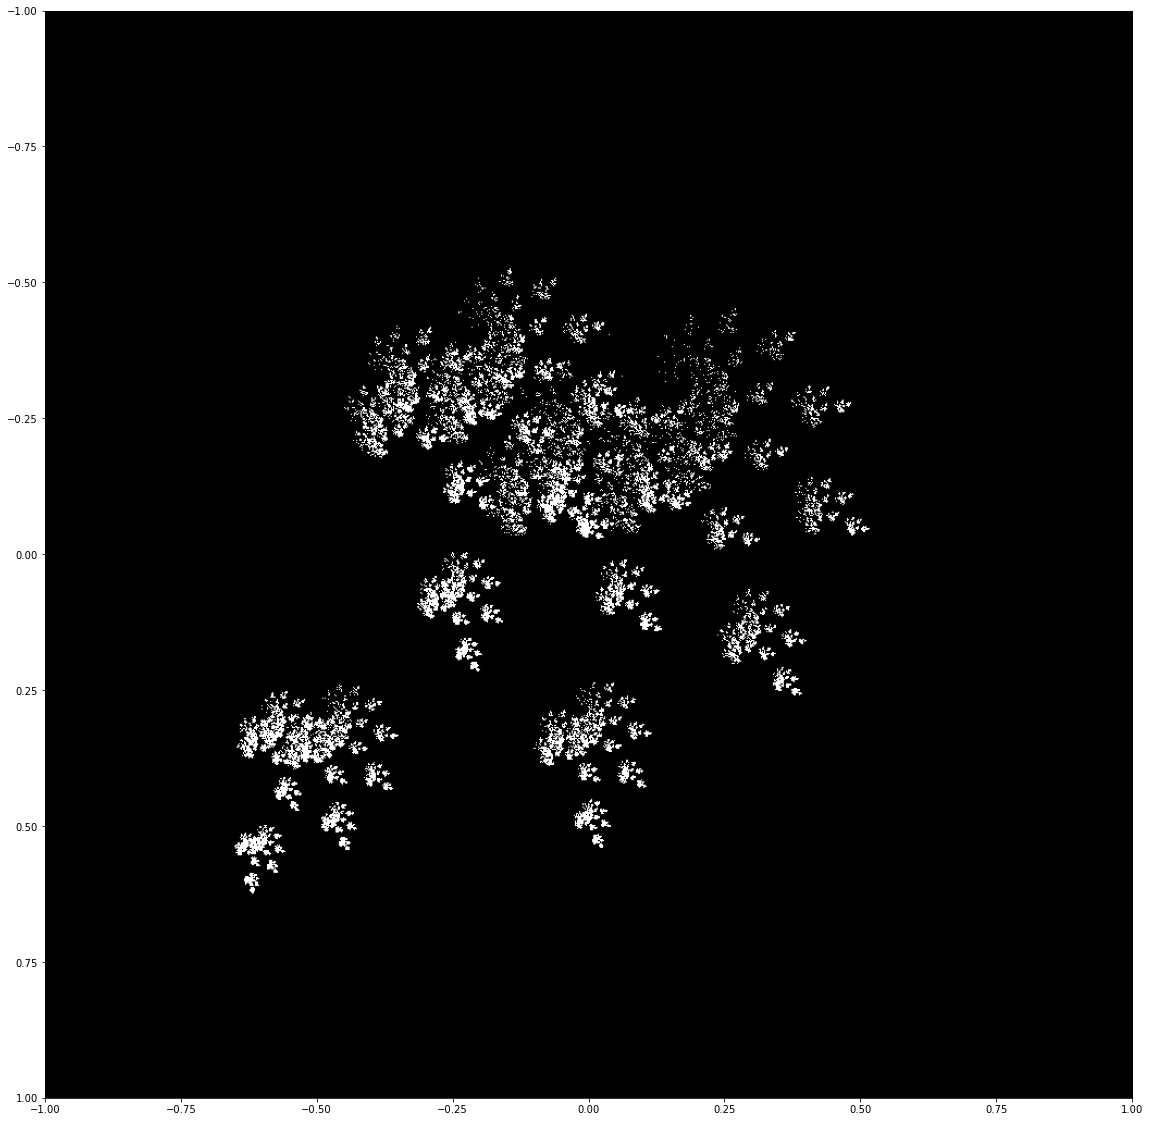

In [454]:
z = 0.5 + 0.*1j
max_iter = 100000

n = [-0.3735229695178426, -0.1912235414116794, 0.517059716213806, -0.6901126359245606, 0.16840938453070464, -0.32659374024437793, 0.7117608833414364, -0.5269814591200774, -0.6161573784380736, 0.6239373327442885, 0.29875548348412795, -0.29636982389742816]

funcs = [
    (lambda t: shrink_rotate(t, n[0] + n[1]*1j, coef=n[2], angle=n[3])),
    (lambda t: shrink_rotate(t, n[4] + n[5]*1j, coef=n[6], angle=n[7])),
    (lambda t: shrink_rotate(t, n[8] + n[9]*1j, coef=n[10], angle=n[11]))
]
pics = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    pics[int((z.imag + 1) * 500) % 999, int((z.real + 1) * 500) % 999] = 1
plt.figure(figsize=(20, 20))
plt.imshow(pics, cmap='gray', extent=[-1, 1, 1, -1])

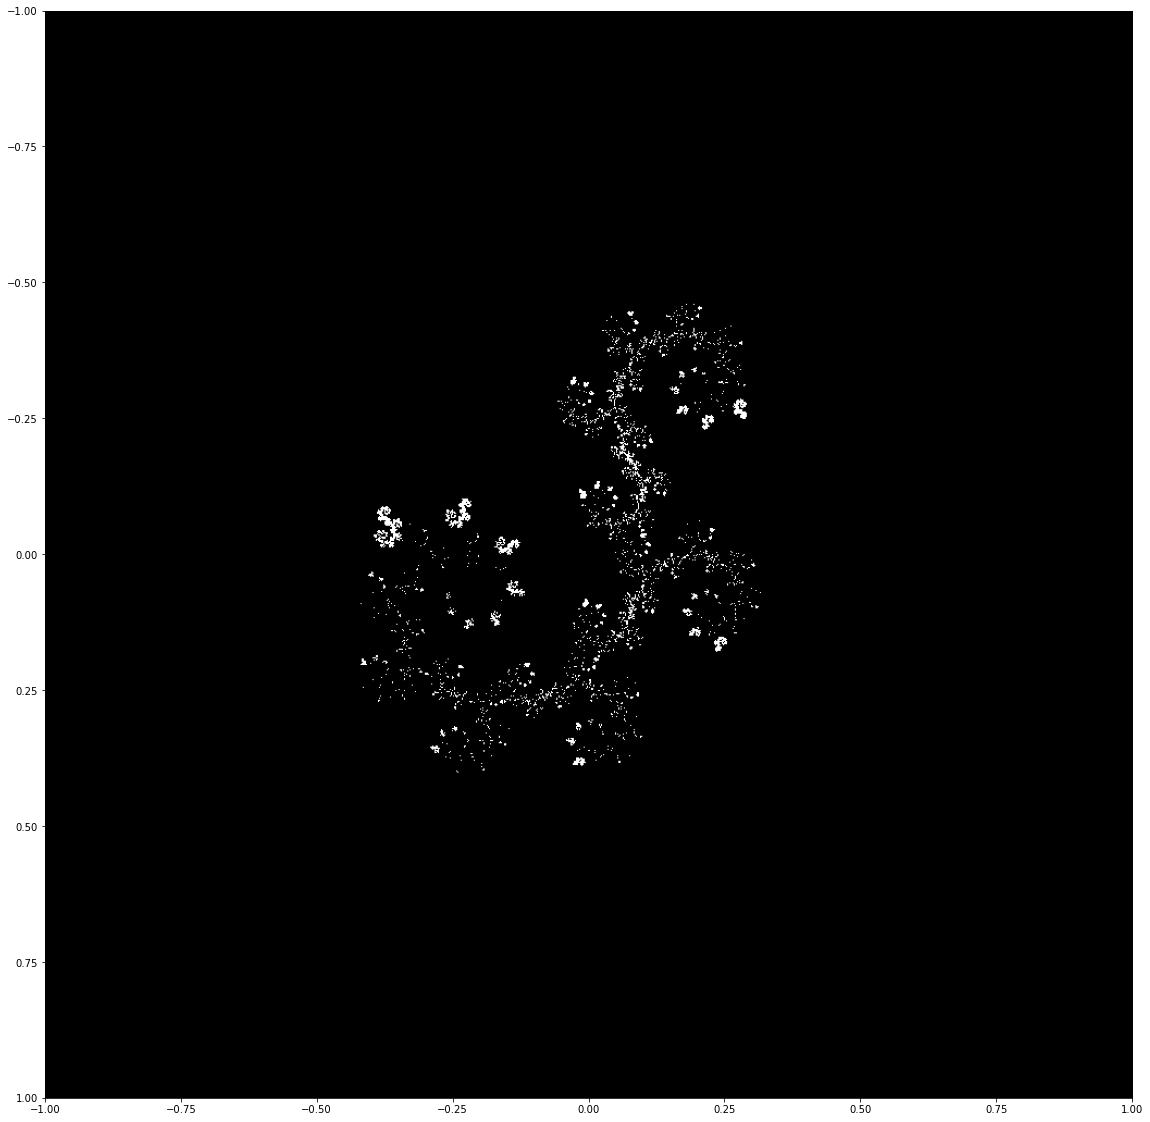

In [455]:
z = 0.5 + 0.*1j
max_iter = 100000

n = [-0.6755886688654664, 0.3428014273907114, 0.7820664087427358, 0.7858403953360757, -0.37327899244850715, 0.09809582858349852, -0.48135691052664753, -0.16957097511676045, -0.8435618942022824, 0.2394594330301456, 0.07974661070619793, -0.7149153191958124]

funcs = [
    (lambda t: shrink_rotate(t, n[0] + n[1]*1j, coef=n[2], angle=n[3])),
    (lambda t: shrink_rotate(t, n[4] + n[5]*1j, coef=n[6], angle=n[7])),
    (lambda t: shrink_rotate(t, n[8] + n[9]*1j, coef=n[10], angle=n[11]))
]
pics = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    pics[int((z.imag + 0.73) * 500) % 999, int((z.real + 1.45) * 500) % 999] = 1
plt.figure(figsize=(20, 20))
plt.imshow(pics, cmap='gray', extent=[-1, 1, 1, -1])

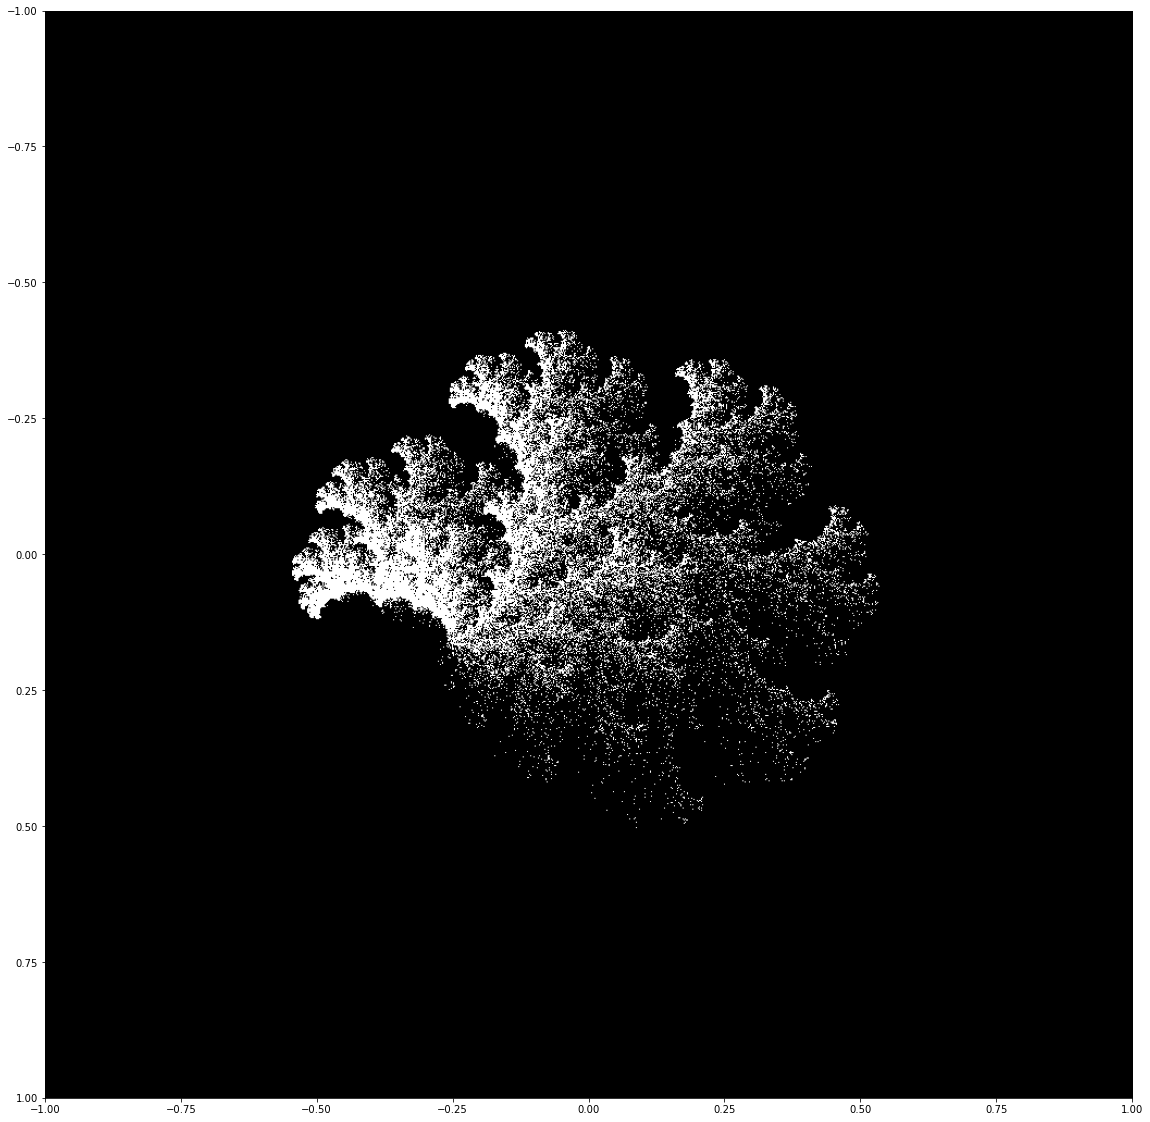

In [431]:
z = 0.5 + 0.*1j
max_iter = 100000

n = [0.5792645347535603, -0.35846481247605544, 0.9018534075860196, 0.8595278267080806, 0.007544120703794066, -0.3751096075714042, 0.41721828930453864, -0.5624131073809158, 0.2383350558697097, -0.3418429310646851, 0.5567509235238914, 0.27755572518756133]

funcs = [
    (lambda t: shrink_rotate(t, n[0] + n[1]*1j, coef=n[2], angle=n[3])),
    (lambda t: shrink_rotate(t, n[4] + n[5]*1j, coef=n[6], angle=n[7])),
    (lambda t: shrink_rotate(t, n[8] + n[9]*1j, coef=n[10], angle=n[11]))
]
pics = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    pics[int((z.imag + 1.49) * 500) % 999, int((z.real + 0.5) * 500) % 999] = 1
plt.figure(figsize=(20, 20))
plt.imshow(pics, cmap='gray', extent=[-1, 1, 1, -1])

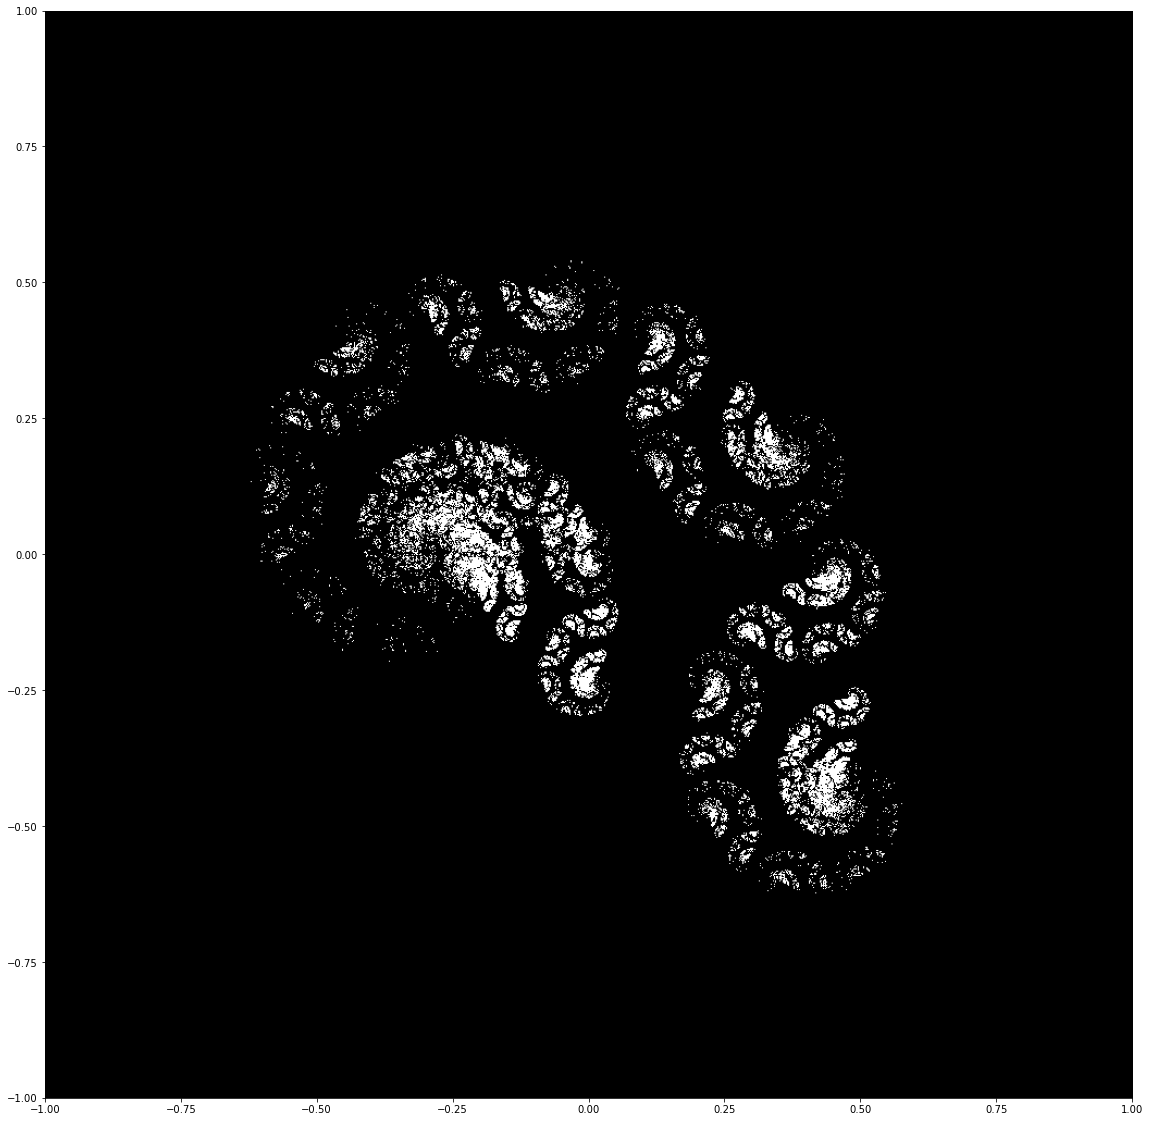

In [483]:
z = 0.5 + 0.*1j
max_iter = 100000

n = [0.2955894099284788, -0.3888602307742861, -0.4692253376278608, 0.9824793819767303, -0.35855688490433546, -0.543200944361032, 0.7780312745886295, -0.8092268075780649, -0.25776944869211516, -0.4672442686535163, 0.3454605773702162, 0.1858100699106715]


funcs = [
    (lambda t: shrink_rotate(t, n[0] + n[1]*1j, coef=n[2], angle=n[3])),
    (lambda t: shrink_rotate(t, n[4] + n[5]*1j, coef=n[6], angle=n[7])),
    (lambda t: shrink_rotate(t, n[8] + n[9]*1j, coef=n[10], angle=n[11]))
]
pics = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    pics[int((z.imag + 1.54) * 500) % 999, int((z.real + 1.06) * 500) % 999] = 1
plt.figure(figsize=(20, 20))
plt.imshow(pics, cmap='gray', extent=[-1, 1, -1, 1])

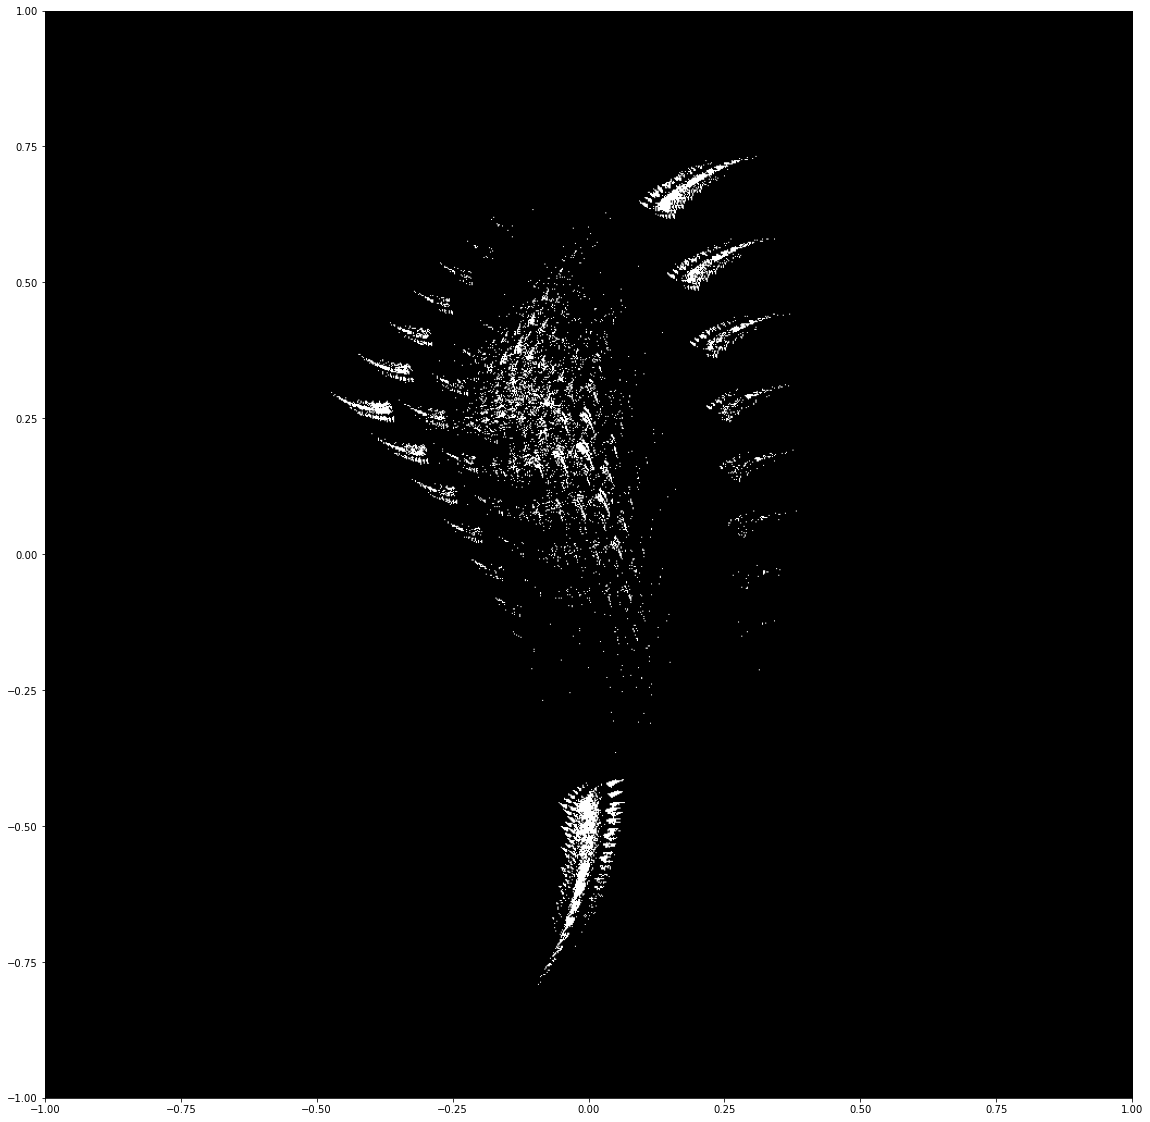

In [453]:
z = 0.5 + 0.*1j
max_iter = 100000

n = [0.23947, 0.98618, 0.927786, 0.057460, 0.526166, 0.73112646, 0.14087, 0.1792240, 0.414783, -0.151971, -0.5705226, 0.80952]


funcs = [
    (lambda t: shrink_rotate(t, n[0] + n[1]*1j, coef=n[2], angle=n[3])),
    (lambda t: shrink_rotate(t, n[4] + n[5]*1j, coef=n[6], angle=n[7])),
    (lambda t: shrink_rotate(t, n[8] + n[9]*1j, coef=n[10], angle=n[11]))
]
pics = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    pics[int((z.imag + 0.86) * 500) % 999, int((z.real + 0.46) * 500) % 999] = 1
plt.figure(figsize=(20, 20))
plt.imshow(pics, cmap='gray', extent=[-1, 1, -1, 1])

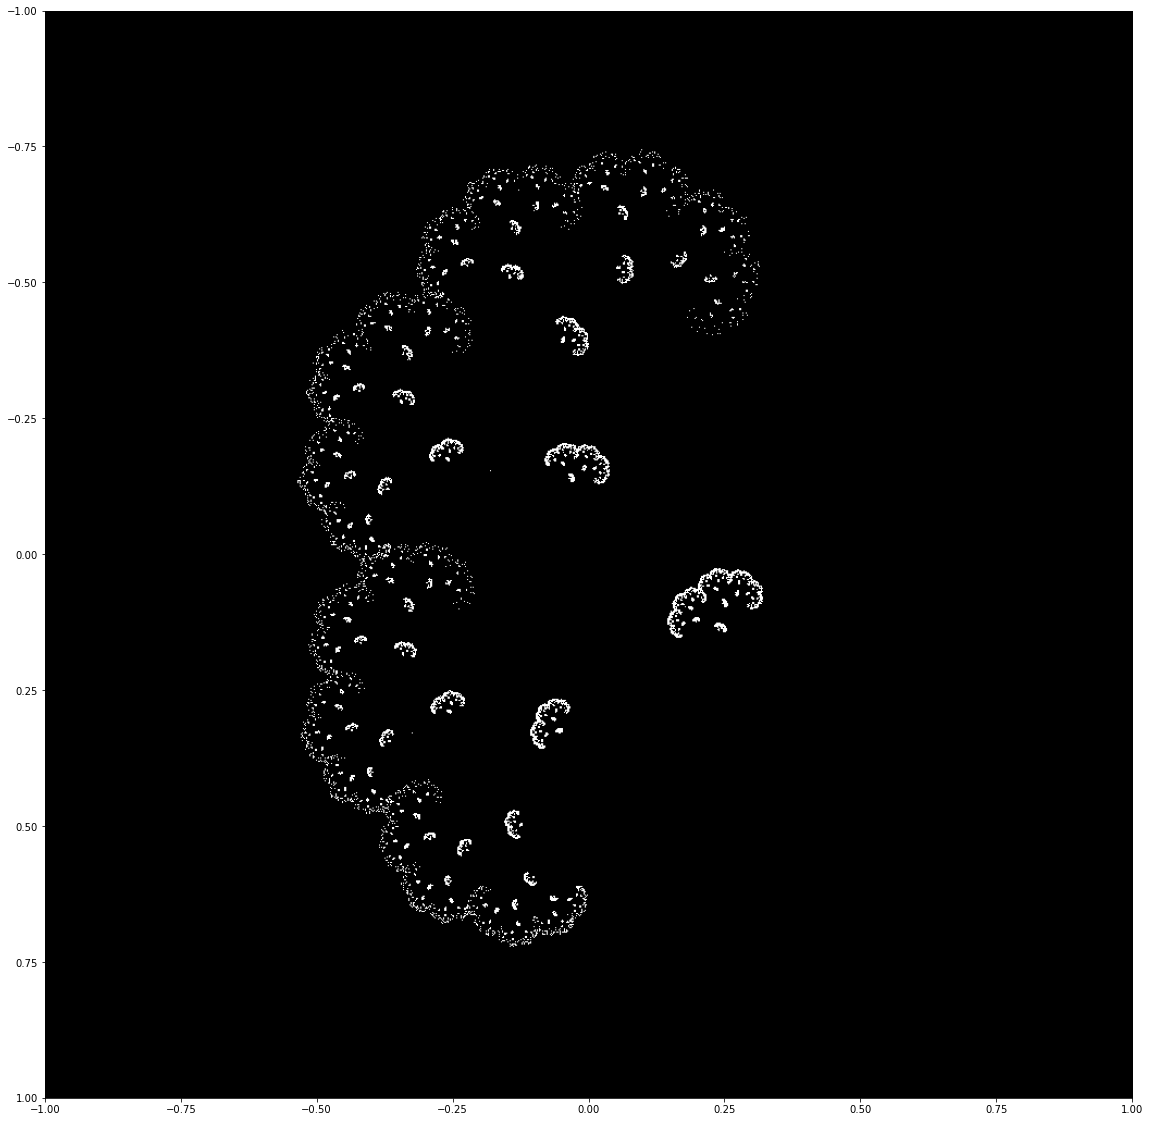

In [496]:
z = 0.5 + 0.*1j
max_iter = 100000

n = [0.6779695194921433, -0.13068429178147323, 0.12581883146081463, 0.9319561294168597, 0.6376680174786666, -0.7155022402825499, 0.6565296953747524, 0.7202712358460384, 0.4167239853971567, 0.3434490459226087, 0.5307801644736698, -0.6134828314671961]

funcs = [
    (lambda t: shrink_rotate(t, n[0] + n[1]*1j, coef=n[2], angle=n[3])),
    (lambda t: shrink_rotate(t, n[4] + n[5]*1j, coef=n[6], angle=n[7])),
    (lambda t: shrink_rotate(t, n[8] + n[9]*1j, coef=n[10], angle=n[11]))
]
pics = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    pics[int((z.imag + 1.27) * 500) % 999, int((z.real + 0.56) * 500) % 999] = 1
plt.figure(figsize=(20, 20))
plt.imshow(pics, cmap='gray', extent=[-1, 1, 1, -1])

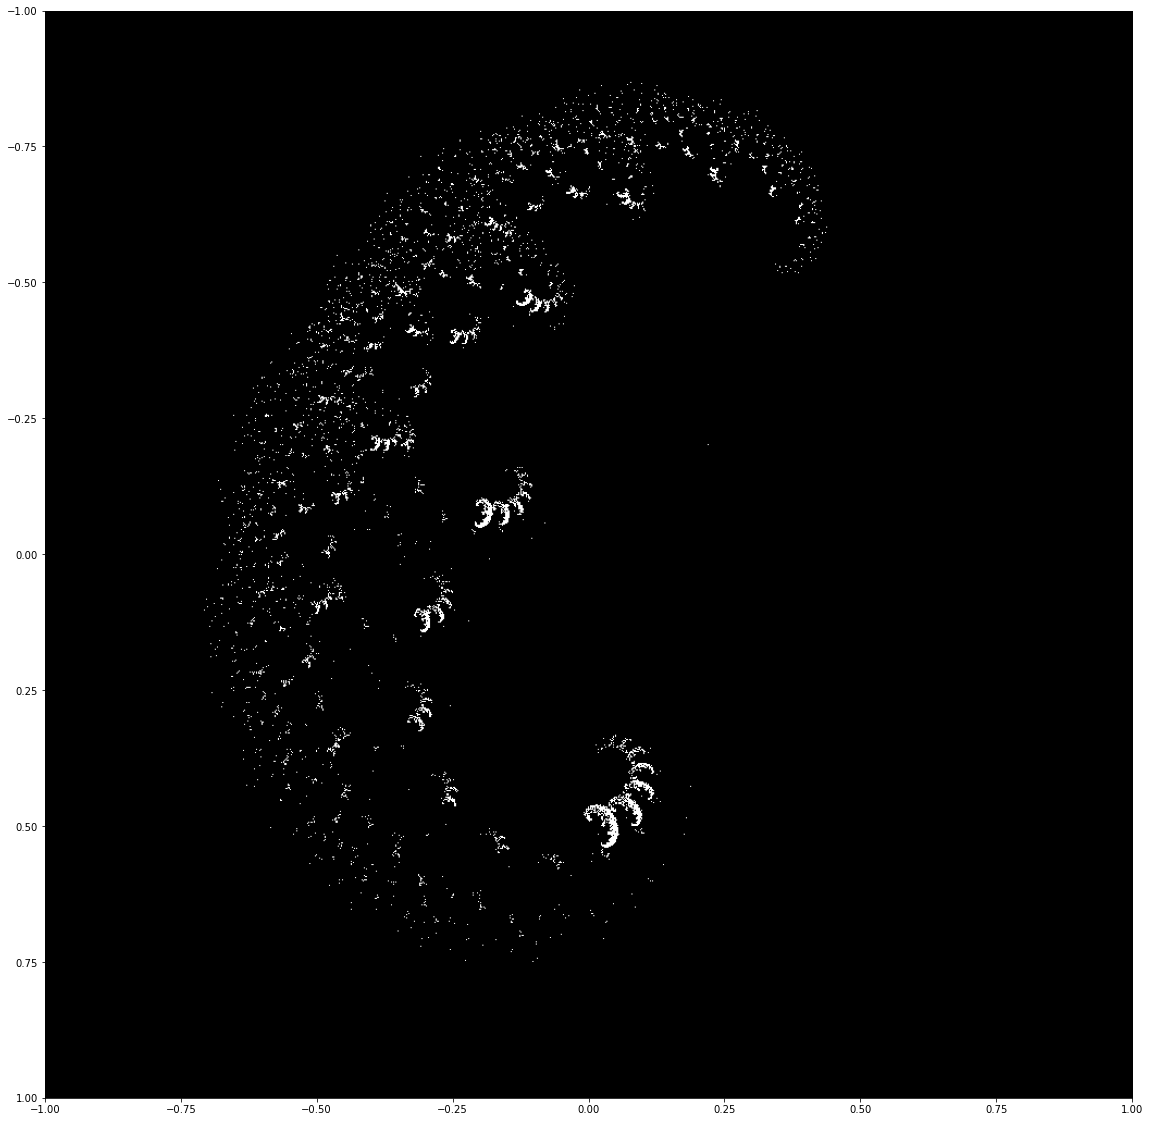

In [488]:
z = 0.5 + 0.*1j
max_iter = 100000

n = [0.06913675070619196, 0.382061164396994, 0.8345913273450836, -0.45443356158309944, 0.04061912592326222, 0.48214819997415237, -0.049997975513558, -0.7825505637118668, 0.3843992340758393, -0.5417369245807169, 0.6554511134996492, 0.560101270651844]

funcs = [
    (lambda t: shrink_rotate(t, n[0] + n[1]*1j, coef=n[2], angle=n[3])),
    (lambda t: shrink_rotate(t, n[4] + n[5]*1j, coef=n[6], angle=n[7])),
    (lambda t: shrink_rotate(t, n[8] + n[9]*1j, coef=n[10], angle=n[11]))
]
pics = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    pics[int((z.imag + 1) * 500) % 999, int((z.real + 0.96) * 500) % 999] = 1
plt.figure(figsize=(20, 20))
plt.imshow(pics, cmap='gray', extent=[-1, 1, 1, -1])

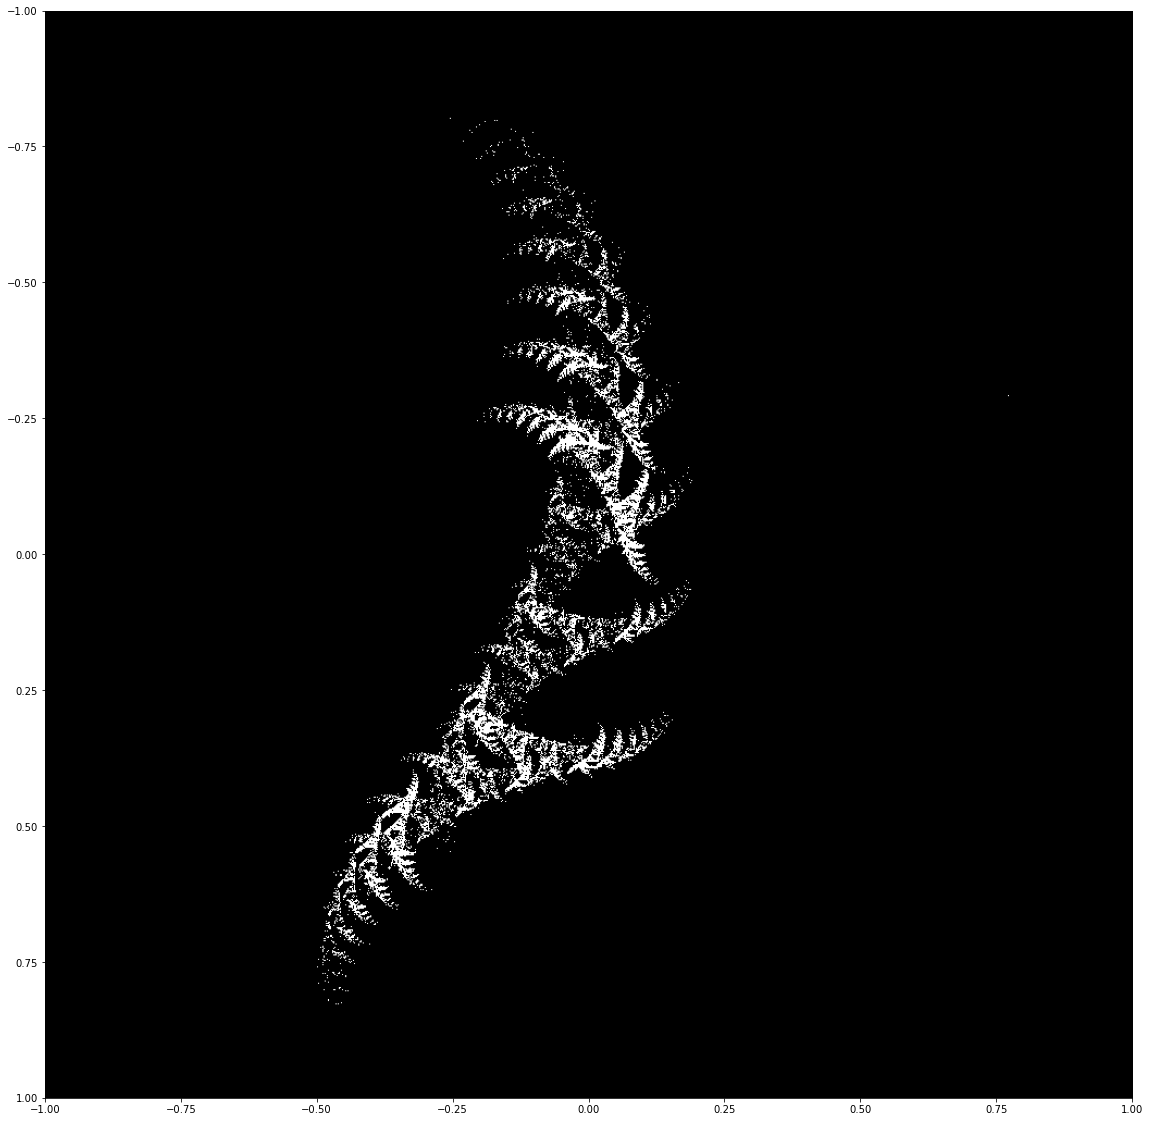

In [484]:
z = 0.5 + 0.*1j
max_iter = 100000

n = [-0.8091310221801067, -0.7554123900778755, 0.8452343304255292, -0.15066985519945297, -0.4273649059496796, -0.20103675309474411, 0.27112767632564583, -0.9660171891198277, -0.5170521087044182, 0.35956870505424954, -0.5003972783785391, 0.6908350901604781]

funcs = [
    (lambda t: shrink_rotate(t, n[0] + n[1]*1j, coef=n[2], angle=n[3])),
    (lambda t: shrink_rotate(t, n[4] + n[5]*1j, coef=n[6], angle=n[7])),
    (lambda t: shrink_rotate(t, n[8] + n[9]*1j, coef=n[10], angle=n[11]))
]
pics = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    pics[int((z.imag + 1) * 500) % 999, int((z.real + 1.39) * 500) % 999] = 1
plt.figure(figsize=(20, 20))
plt.imshow(pics, cmap='gray', extent=[-1, 1, 1, -1])

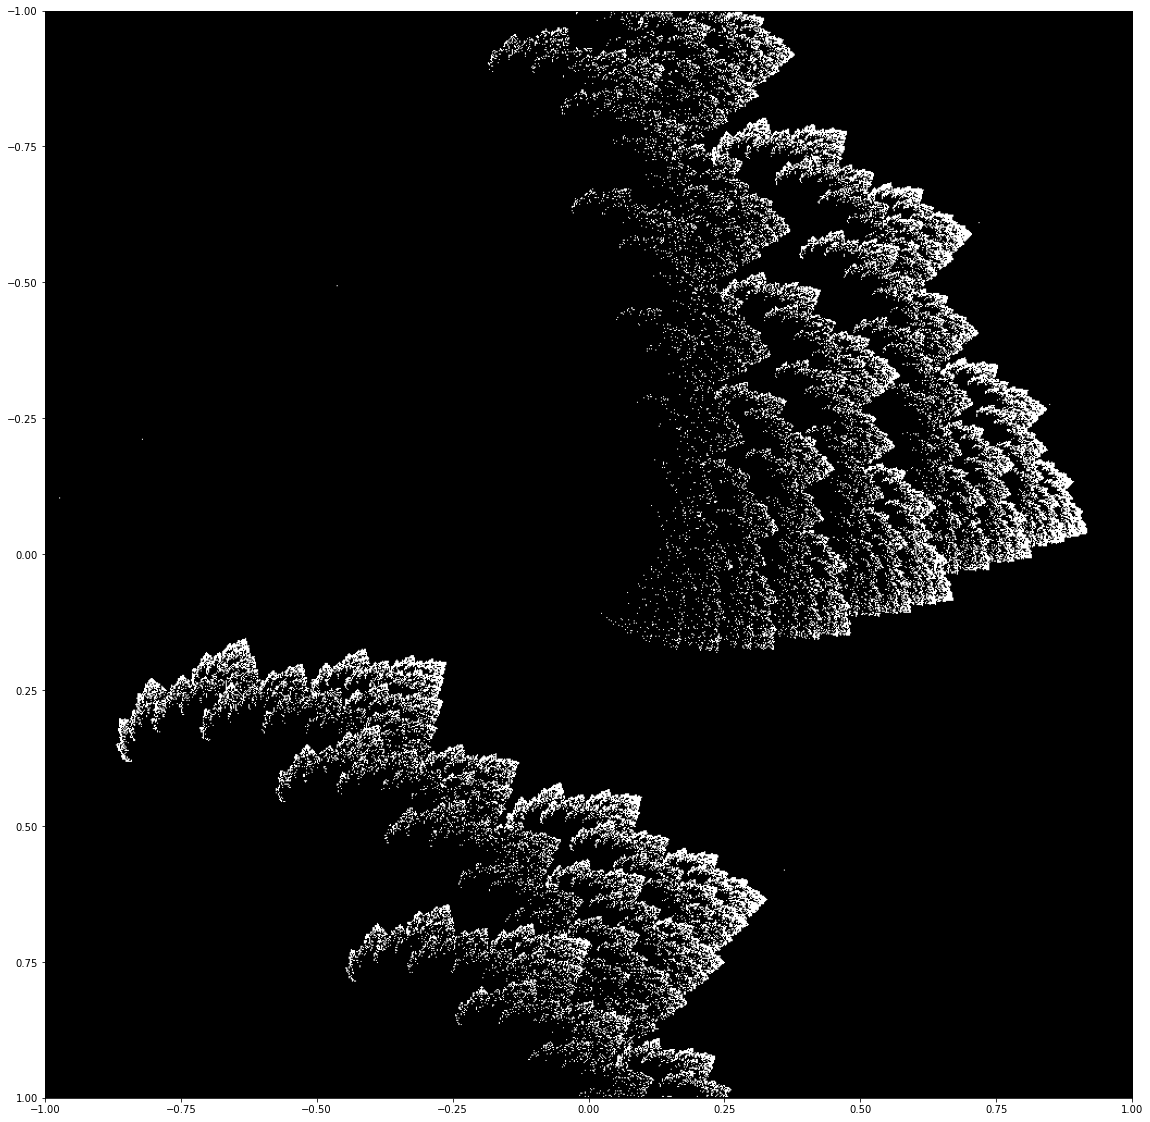

In [457]:
from random import uniform

z = 0.5 + 0.*1j
max_iter = 100000

n = [-0.04207732827162114, 0.47980345206335384, 0.4062302370084958, 0.05033100546186642, -0.4940727480952518, 0.5403392149108359, 0.7196978758174044, 0.13674671524976834, -0.9203788429451141, -0.3109437093370091, 0.5057233958219618, -0.5158908419453605]

funcs = [
    (lambda t: shrink_rotate(t, n[0] + n[1]*1j, coef=n[2], angle=n[3])),
    (lambda t: shrink_rotate(t, n[4] + n[5]*1j, coef=n[6], angle=n[7])),
    (lambda t: shrink_rotate(t, n[8] + n[9]*1j, coef=n[10], angle=n[11]))
]
pics = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    pics[int((z.imag + 1) * 1000) % 999, int((z.real + 1) * 1000) % 999] = 1
plt.figure(figsize=(20, 20))
plt.imshow(pics, cmap='gray', extent=[-1, 1, 1, -1])

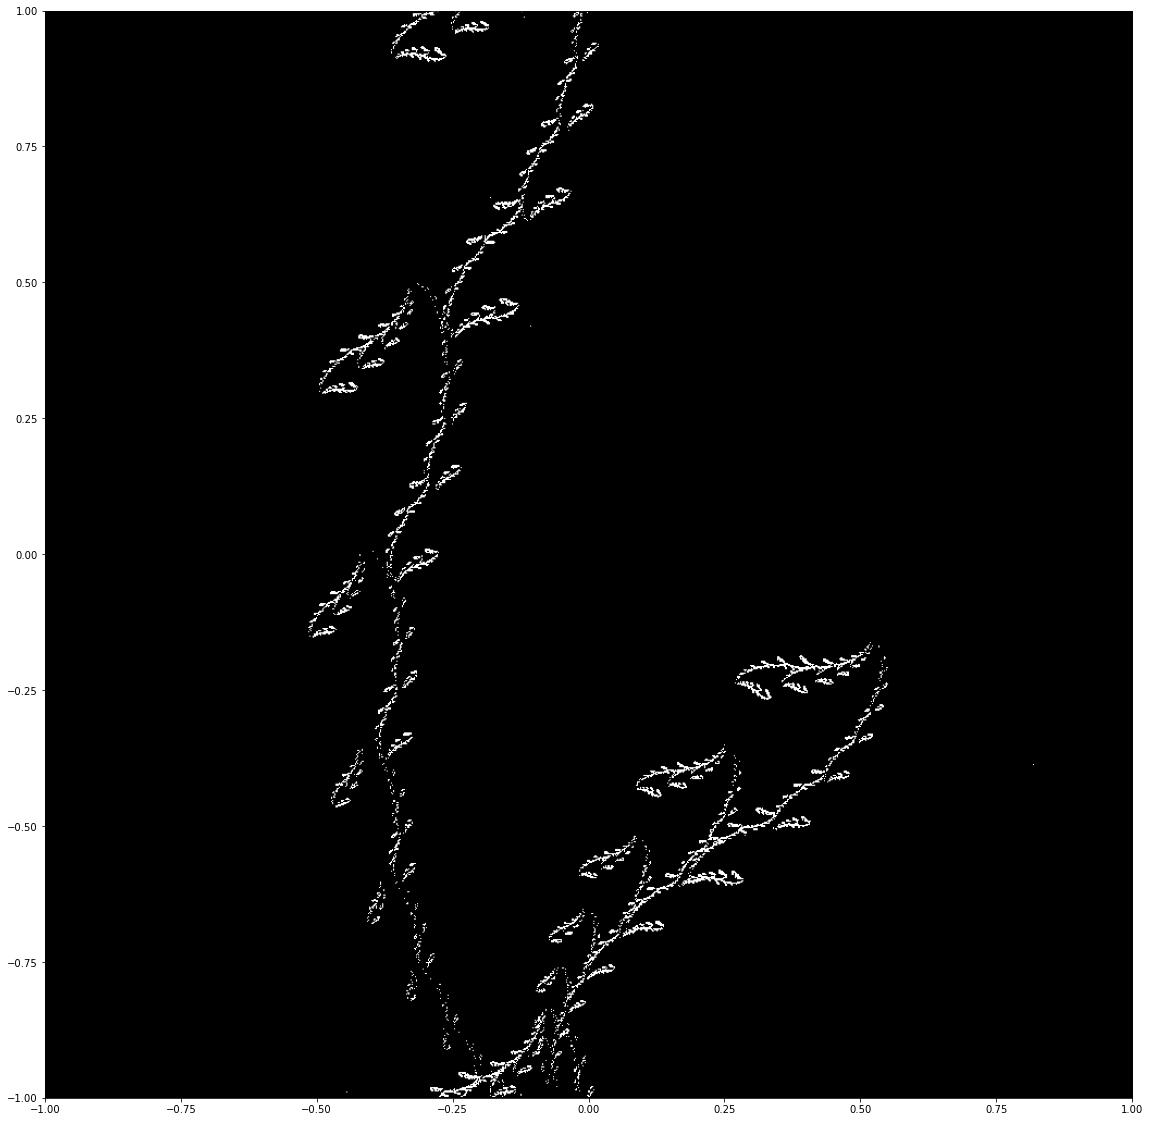

In [458]:
z = 0.5 + 0.*1j
max_iter = 100000

n = [-0.833820963265482, 0.6530050530092015, 0.7075770650985318, -0.1714170089908027, -0.9711021820581671, -0.9397549434067483, -0.3621011751354559, 0.21593797564275952, -0.47479130379059, -0.0977455181608311, -0.25772597781022766, 0.6512204083536262]


funcs = [
    (lambda t: shrink_rotate(t, n[0] + n[1]*1j, coef=n[2], angle=n[3])),
    (lambda t: shrink_rotate(t, n[4] + n[5]*1j, coef=n[6], angle=n[7])),
    (lambda t: shrink_rotate(t, n[8] + n[9]*1j, coef=n[10], angle=n[11]))
]
pics = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    pics[int((z.imag + 1.35) * 500) % 999, int((z.real + 1.8) * 500) % 999] = 1
plt.figure(figsize=(20, 20))
plt.imshow(pics, cmap='gray', extent=[-1, 1, -1, 1])

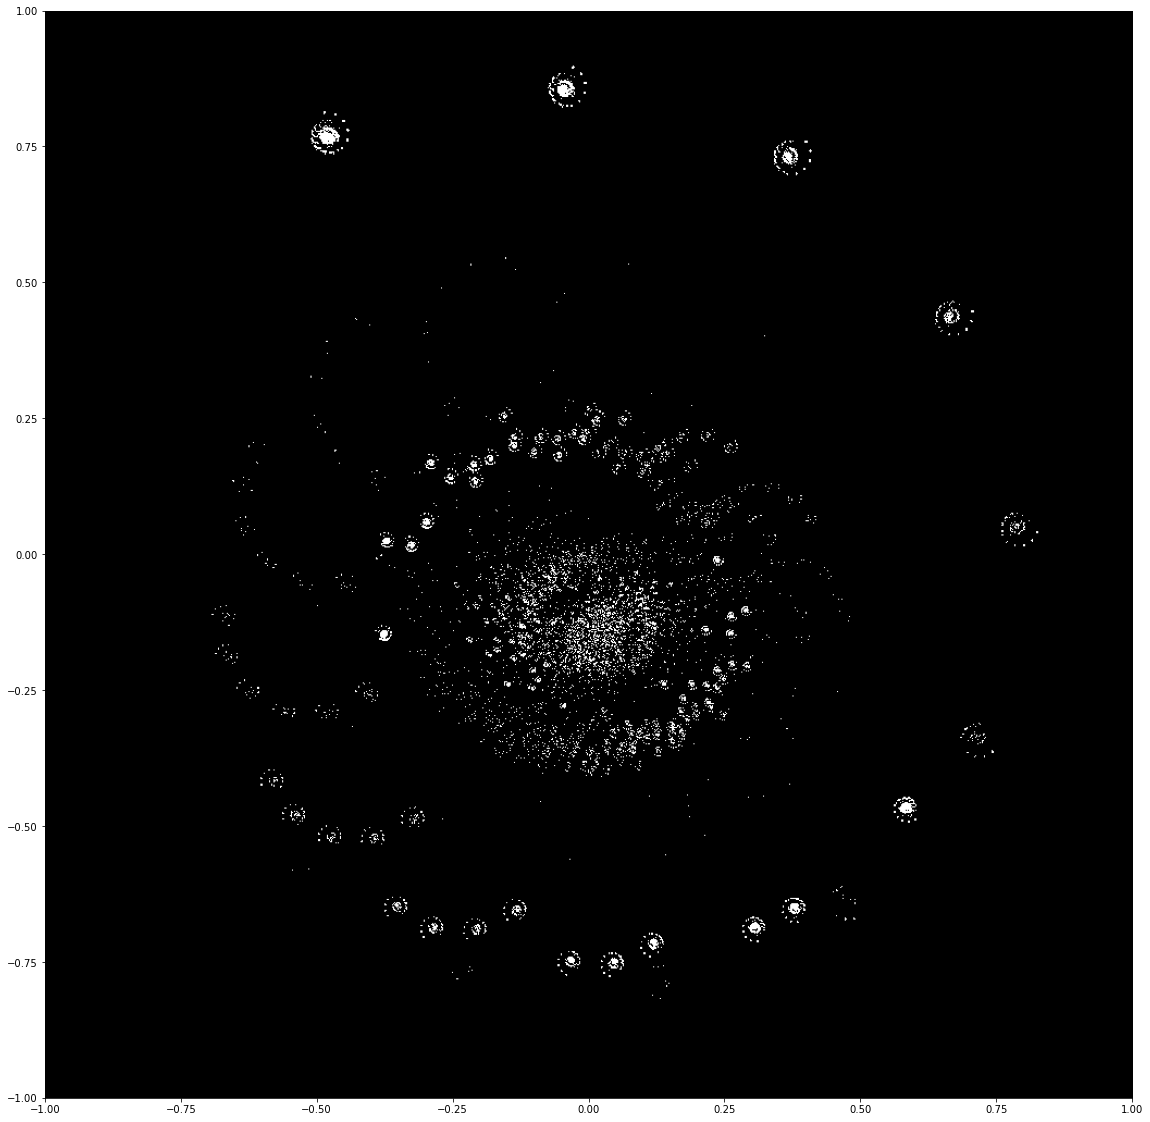

In [459]:
z = 0.5 + 0.*1j
max_iter = 100000

n = [-0.7656266747921054, -0.7433812708833907, 0.04465730268751367, 0.36216588121955406, -0.3126519163374306, 0.1186118756971164, 0.9701174488488913, 0.4882477790480382, -0.2555045125572575, 0.2118903551537792, -0.6206684245894027, -0.5388607677227784]


funcs = [
    (lambda t: shrink_rotate(t, n[0] + n[1]*1j, coef=n[2], angle=n[3])),
    (lambda t: shrink_rotate(t, n[4] + n[5]*1j, coef=n[6], angle=n[7])),
    (lambda t: shrink_rotate(t, n[8] + n[9]*1j, coef=n[10], angle=n[11]))
]
pics = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    pics[int((z.imag + 0.93) * 500) % 999, int((z.real + 1.28) * 500) % 999] = 1
plt.figure(figsize=(20, 20))
plt.imshow(pics, cmap='gray', extent=[-1, 1, -1, 1])

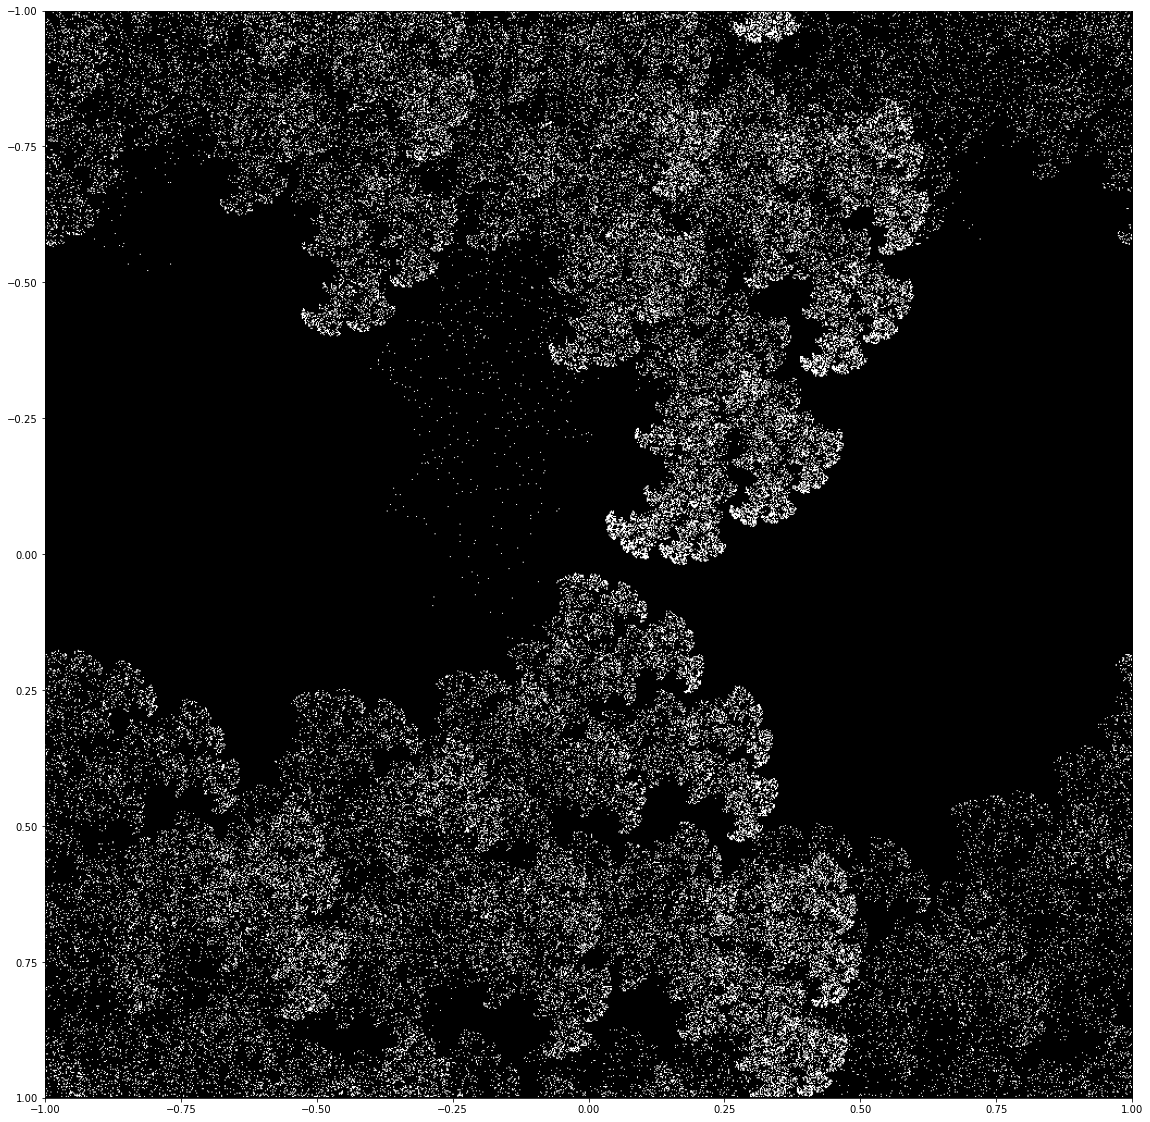

In [461]:
z = 0.5 + 0.*1j
max_iter = 100000

n = [0.522581233301725, 0.46053444115562203, 0.4845483649583282, 0.6360374649344458, 0.46953226787668245, -0.4722994358049355, 0.5459020254112974, -0.2734938267976008, -0.42797660906593826, 0.5821018530490127, 0.7669773222562519, -0.3061044038832761]

funcs = [
    (lambda t: shrink_rotate(t, n[0] + n[1]*1j, coef=n[2], angle=n[3])),
    (lambda t: shrink_rotate(t, n[4] + n[5]*1j, coef=n[6], angle=n[7])),
    (lambda t: shrink_rotate(t, n[8] + n[9]*1j, coef=n[10], angle=n[11]))
]
pics = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    pics[int((z.imag + 1) * 1000) % 999, int((z.real + 1) * 1000) % 999] = 1
plt.figure(figsize=(20, 20))
plt.imshow(pics, cmap='gray', extent=[-1, 1, 1, -1])

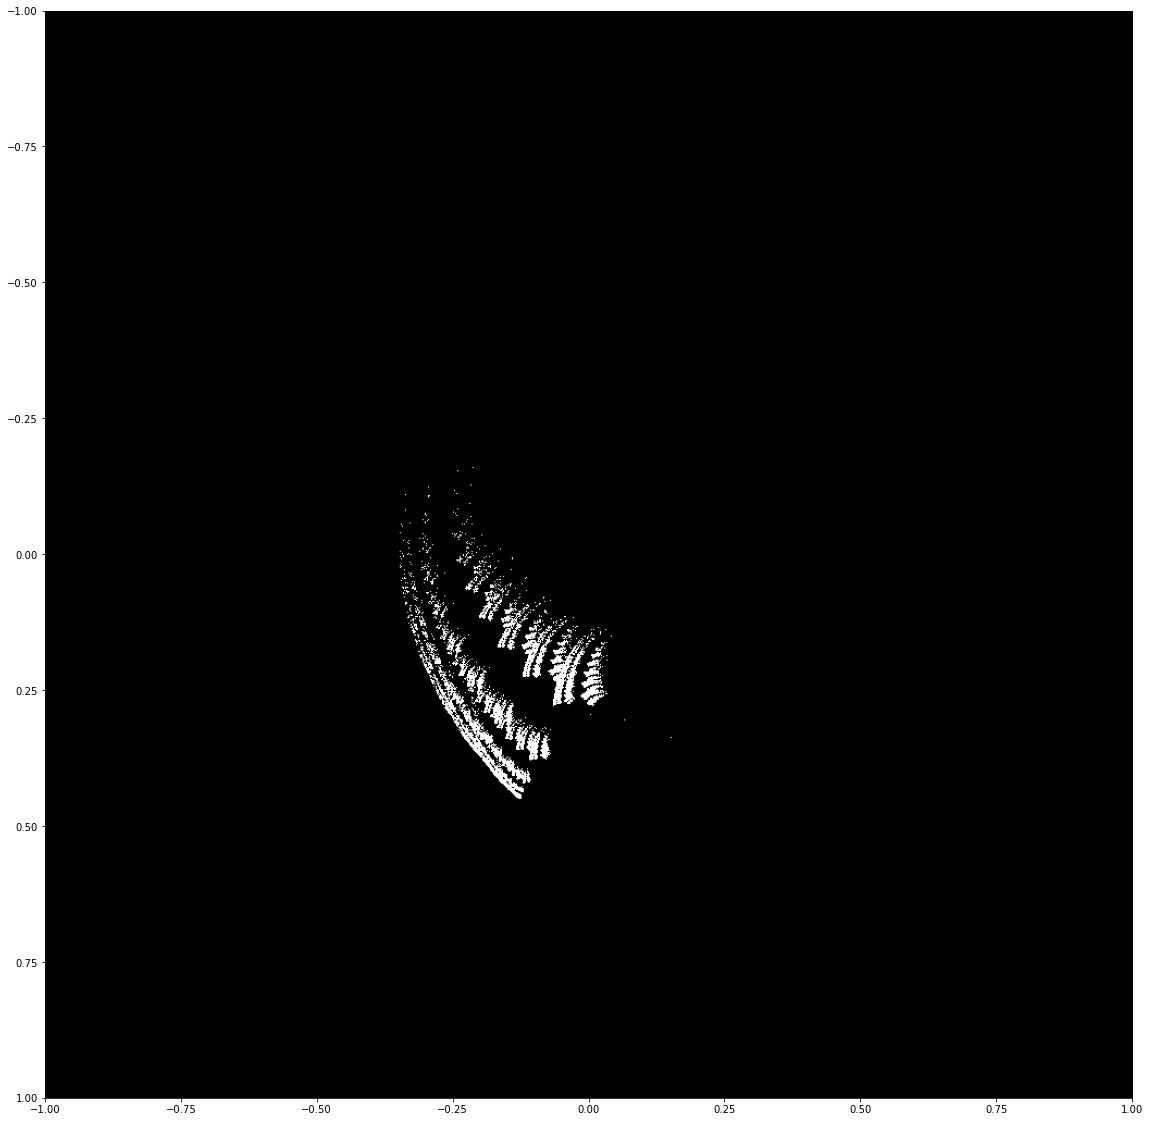

In [489]:
z = 0.5 + 0.*1j
max_iter = 100000

n = [-0.002546710189269552, 0.27402137594568354, 0.2888650179988572, 0.894231254920385, -0.12581545635837377, 0.4497513269401465, 0.4013760826008488, -0.09475130208090321, -0.033576828120704505, -0.23345535702399922, 0.9119207253681827, 0.1291893396493795]

funcs = [
    (lambda t: shrink_rotate(t, n[0] + n[1]*1j, coef=n[2], angle=n[3])),
    (lambda t: shrink_rotate(t, n[4] + n[5]*1j, coef=n[6], angle=n[7])),
    (lambda t: shrink_rotate(t, n[8] + n[9]*1j, coef=n[10], angle=n[11]))
]
pics = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    pics[int((z.imag + 1) * 500) % 999, int((z.real + 1) * 500) % 999] = 1
plt.figure(figsize=(20, 20))
plt.imshow(pics, cmap='gray', extent=[-1, 1, 1, -1])

## Часть 6 (бонус). Метод Гаусса или обратные матрицы?

Пусть нам дано матричное уравнение $Ax = B$, где $A$ &mdash; матрица размера $n\times n$, а $B$ &mdash; матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и одинаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000; например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000; например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимание на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

114 µs ± 21.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
72 µs ± 15.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
313 µs ± 26.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
251 µs ± 22.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
556 µs ± 65.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
564 µs ± 14.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.68 ms ± 39 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.71 ms ± 48.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
13.2 ms ± 333 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.2 ms ± 189 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
55.1 ms ± 3.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
59.9 ms ± 4.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
343 ms ± 46.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
402 ms ± 48.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.26

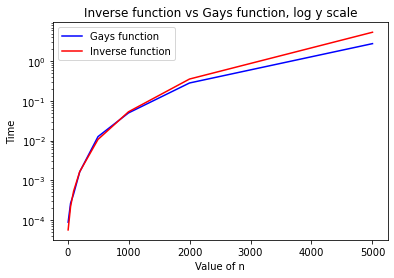

In [503]:
gays_times = []
inverse_times = []
N = [10, 50, 100, 200, 500, 1000, 2000, 5000]
for n in N:
    A = np.random.rand(n, n)
    B = np.random.rand(n, 10)
    res_gays = %timeit -o sla.solve(A, B)
    gays_times.append(res_gays.best)
    res_inverse = %timeit -o sla.inv(A).dot(B)
    inverse_times.append(res_inverse.best)    

plt.semilogy(N, gays_times, color='blue', label='Gays function')
plt.semilogy(N, inverse_times, color='red', label='Inverse function')
plt.title('Inverse function vs Gays function, log y scale')
plt.ylabel('Time')
plt.xlabel('Value of n')
plt.legend()

662 µs ± 69.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
565 µs ± 58.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
790 µs ± 69.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
733 µs ± 54.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.18 ms ± 199 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
957 µs ± 155 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.85 ms ± 149 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.44 ms ± 110 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.4 ms ± 580 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.27 ms ± 444 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.4 ms ± 459 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.54 ms ± 105 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
19.8 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.3 ms ± 744 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

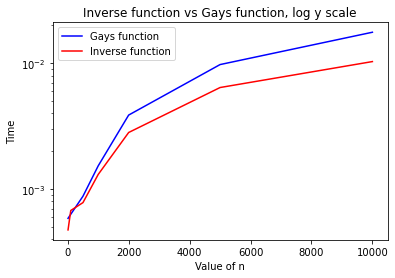

In [502]:
gays_times = []
inverse_times = []
M = [10, 100, 500, 1000, 2000, 5000, 10000]
for m in M:
    A = np.random.rand(100, 100)
    B = np.random.rand(100, m)
    res_gays = %timeit -o sla.solve(A, B)
    gays_times.append(res_gays.best)
    res_inverse = %timeit -o sla.inv(A).dot(B)
    inverse_times.append(res_inverse.best)    

plt.semilogy(M, gays_times, color='blue', label='Gays function')
plt.semilogy(M, inverse_times, color='red', label='Inverse function')
plt.title('Inverse function vs Gays function, log y scale')
plt.ylabel('Time')
plt.xlabel('Value of n')
plt.legend()

In [ ]:
решая методом Гауса мы работаем с матрицей n*m,
а методом поиска обратного элемента, с матрицей n*n (количеством действий во время вычисления A^(-1).dot(B) можно принебречь)
при прочих равных (когда m = n) Гаус и поиск обратного элемента работаю одинакого быстро (+- одинаковое количество действий)
теперь отсаётся подвигать значение m

1) m > n
очевидно, что Гаус работае с матрицей большей размерность чем поиск обратного => 
проделывает большее количество вычислений => 
работает дольше

2) m < n
тут уже поиск обратного элемента работает с матрицей большей размерности => 
больше действий =>
работает дольше Гауса